In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
print('done')

done


In [3]:
sample.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [4]:
train.shape

(1460, 81)

In [5]:
newlist = [x for x in train.columns if train[x].isna().sum() > 0]
na_val=train[newlist].isna().sum()
print(na_val)
print(train.shape)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
(1460, 81)


In [6]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [7]:
# look at numeric and categorical values separately 
df_num=train.select_dtypes('number')
df_cat=train.select_dtypes('object')
print(df_num.shape)
print(df_cat.shape)
#df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

(1460, 38)
(1460, 43)


In [8]:
pd.set_option('display.max_rows', None)
#train['MSSubClass']=train['MSSubClass'].astype(str)
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


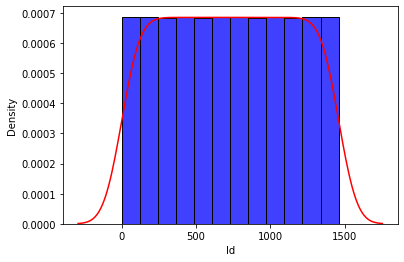

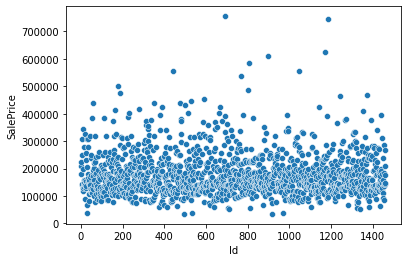

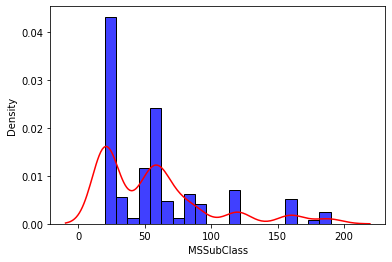

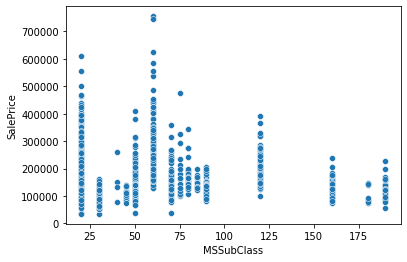

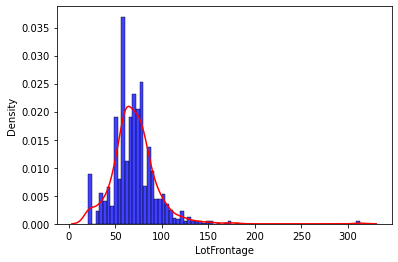

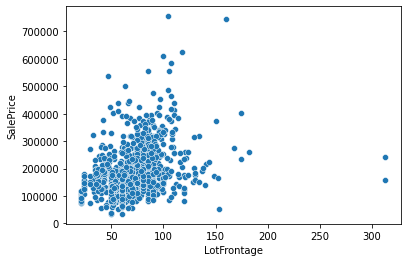

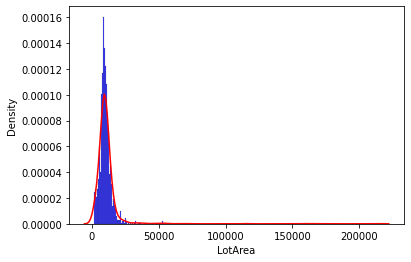

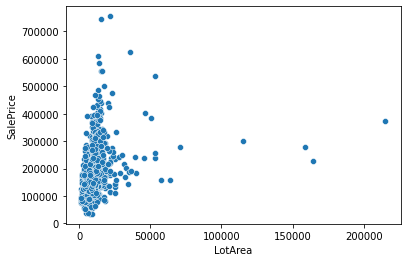

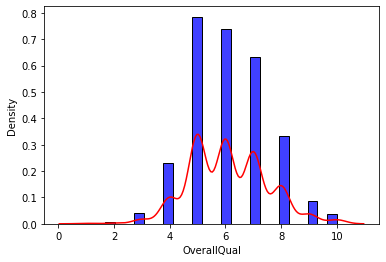

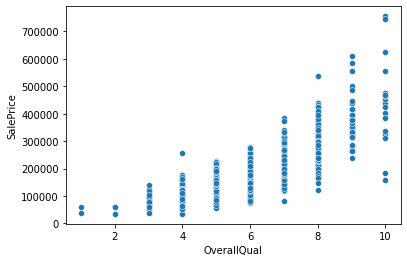

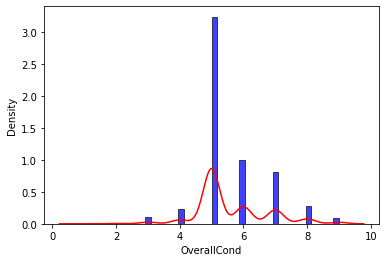

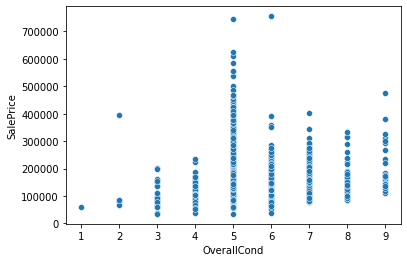

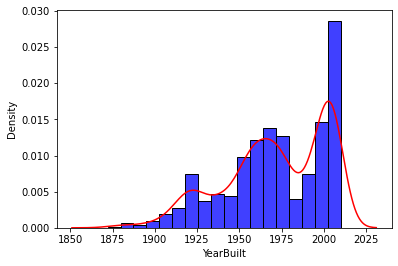

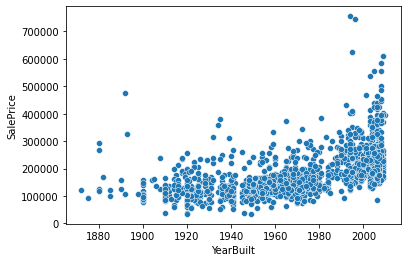

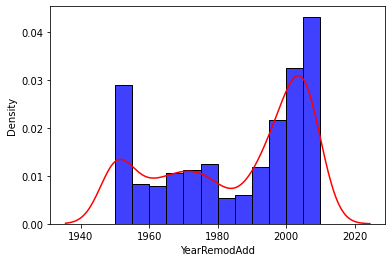

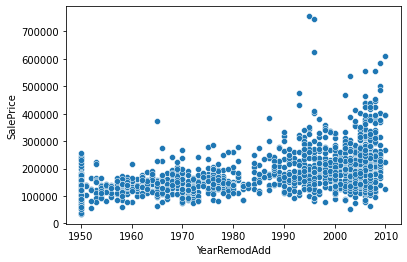

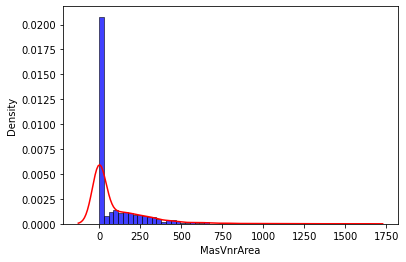

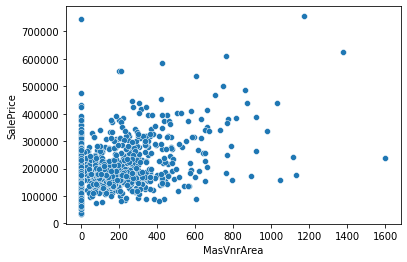

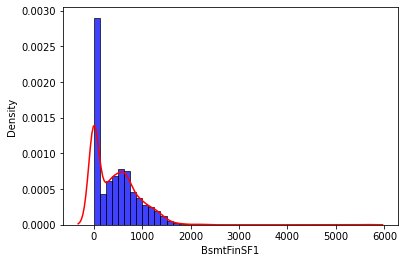

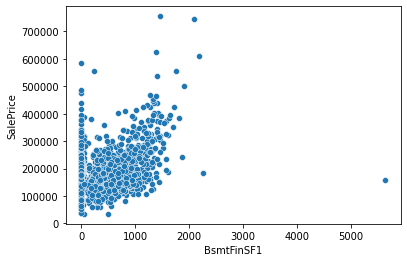

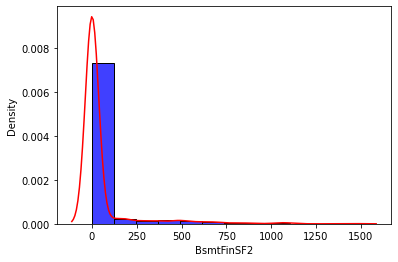

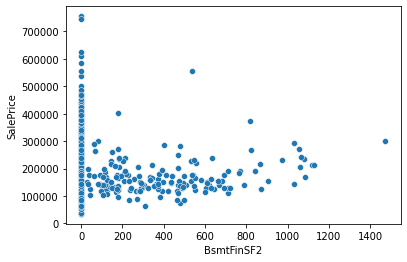

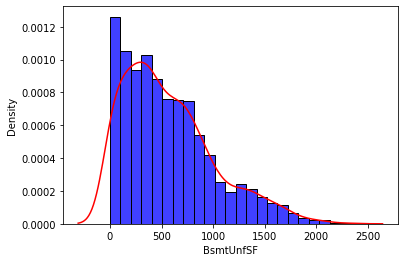

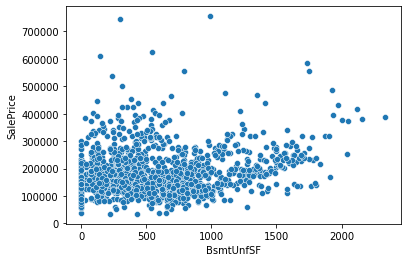

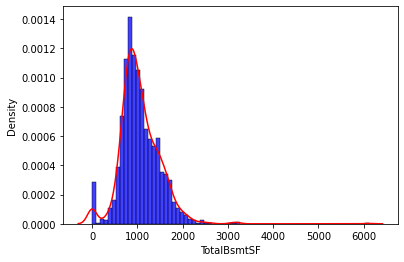

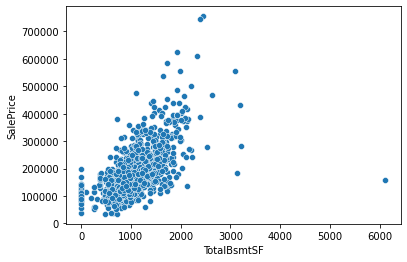

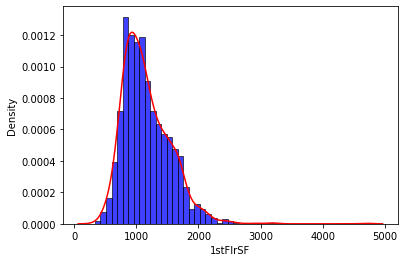

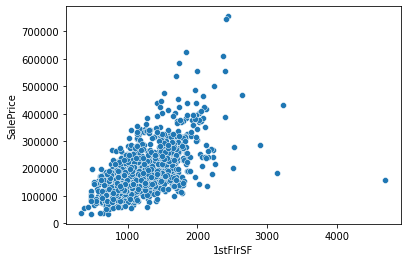

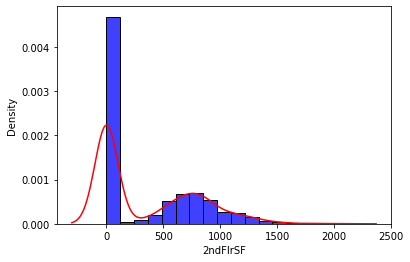

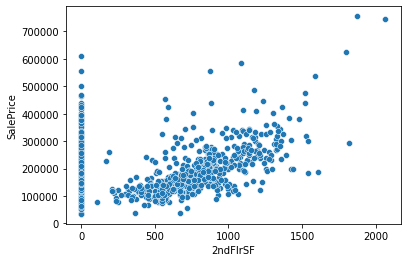

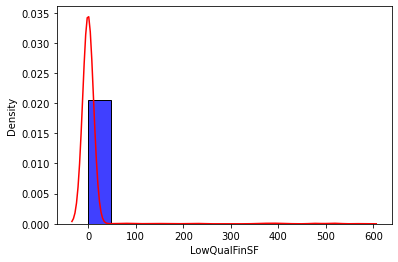

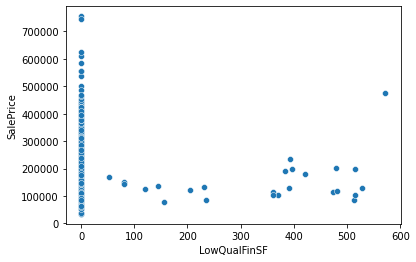

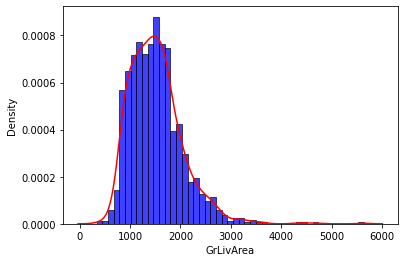

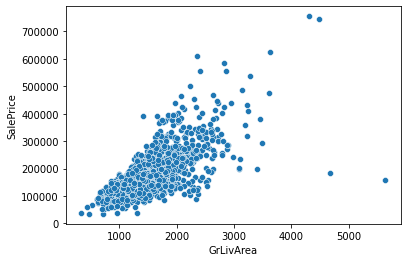

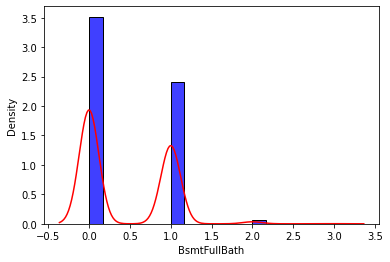

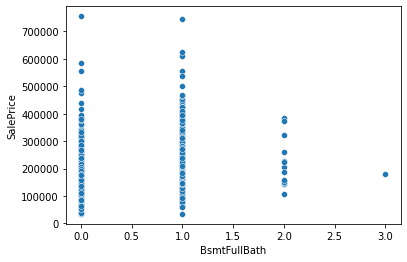

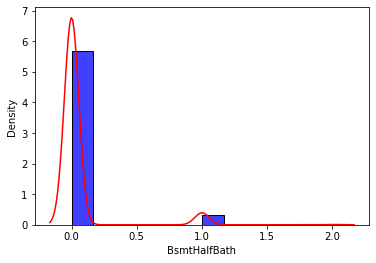

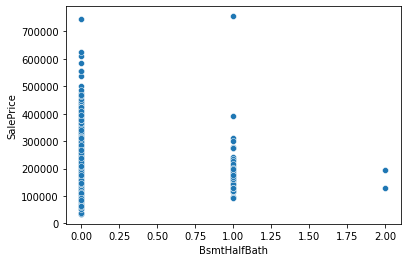

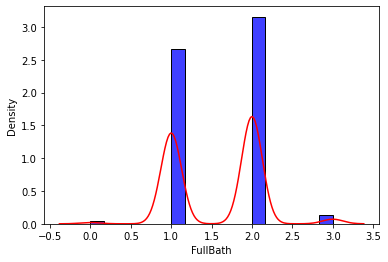

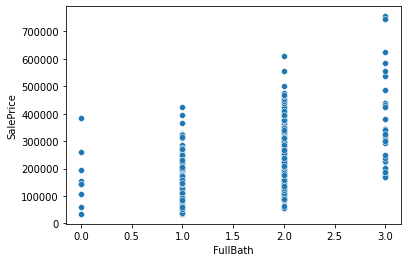

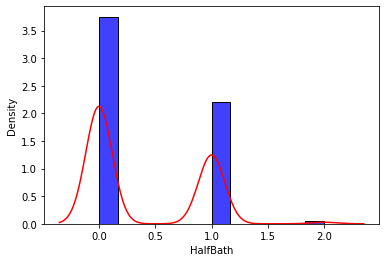

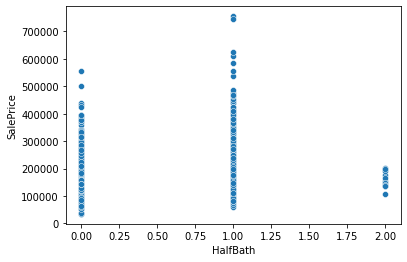

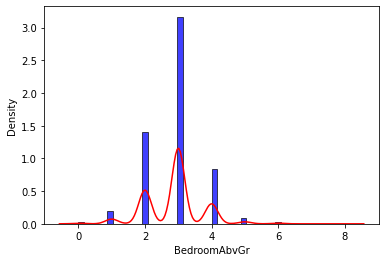

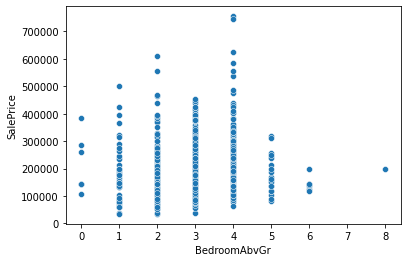

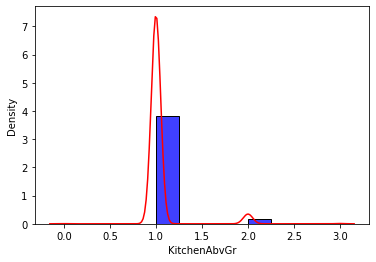

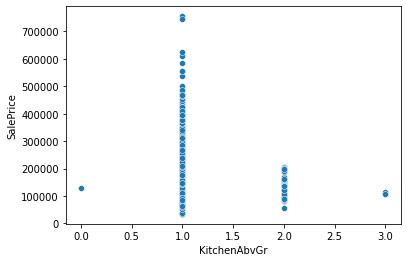

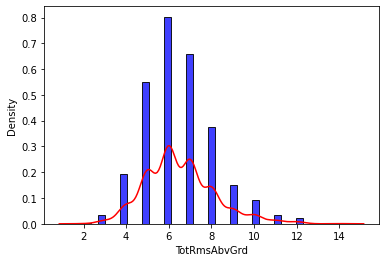

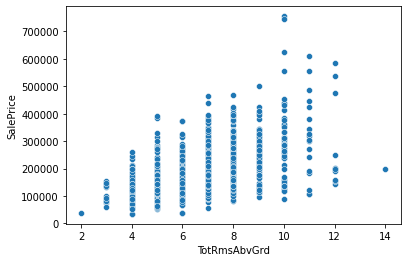

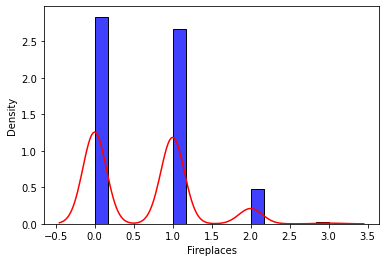

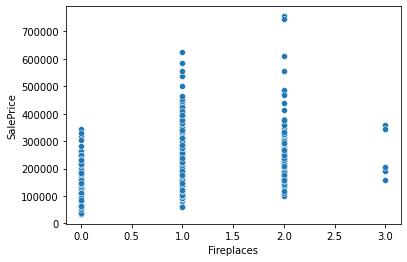

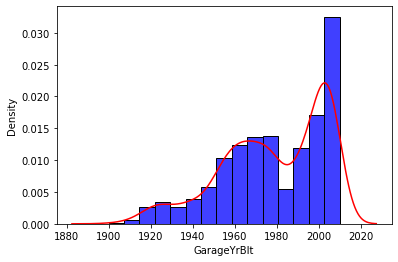

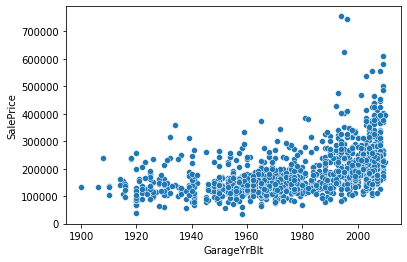

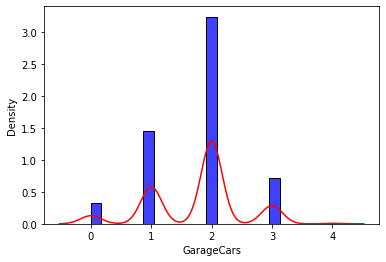

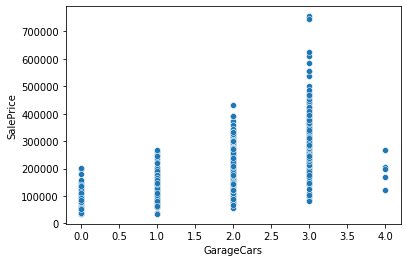

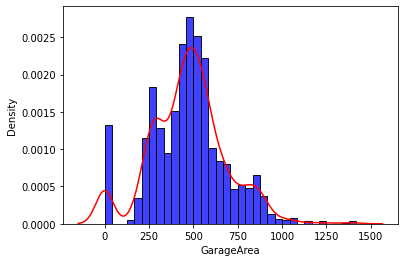

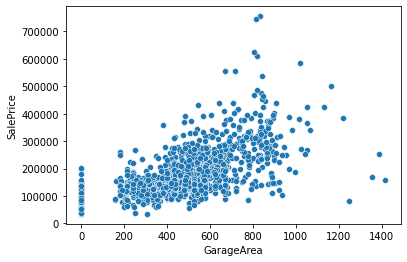

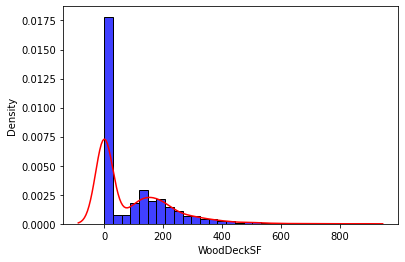

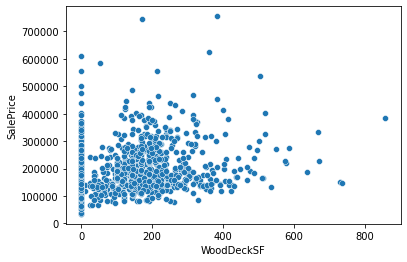

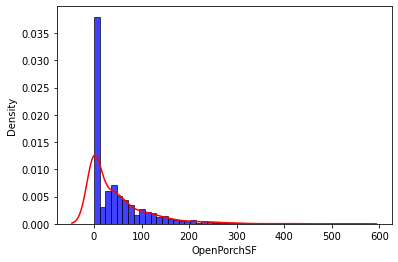

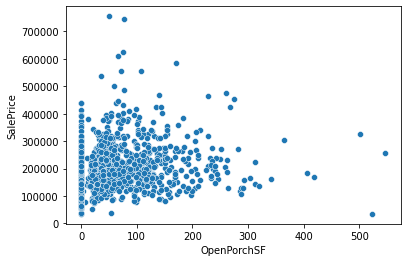

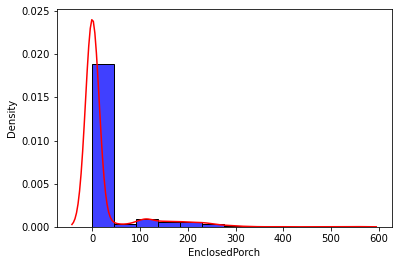

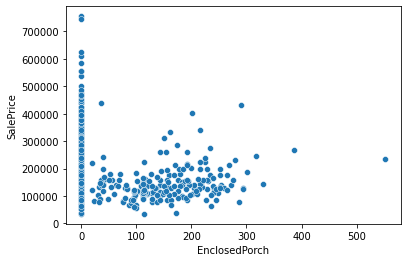

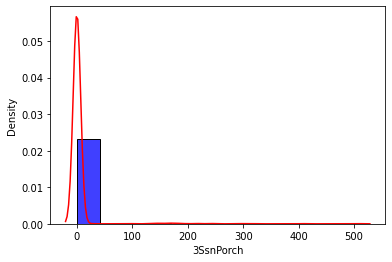

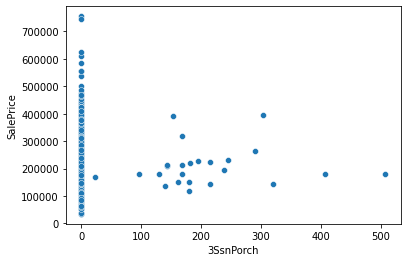

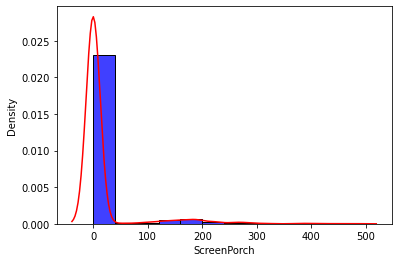

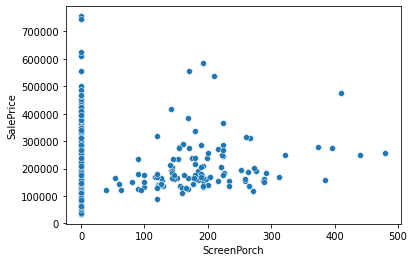

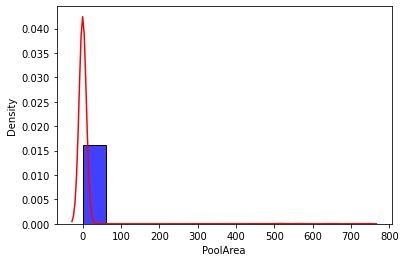

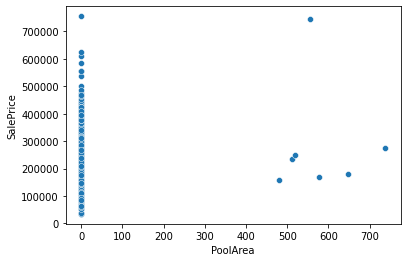

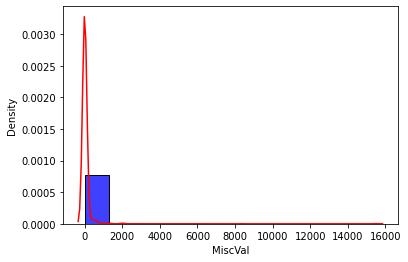

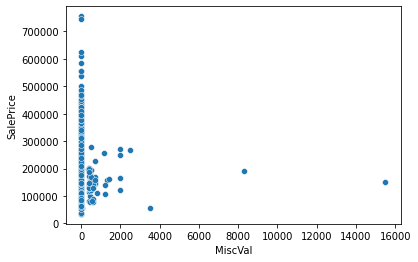

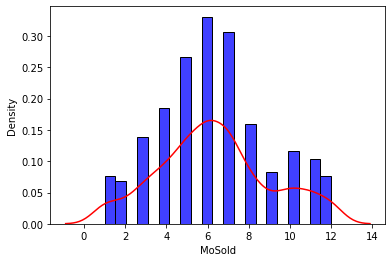

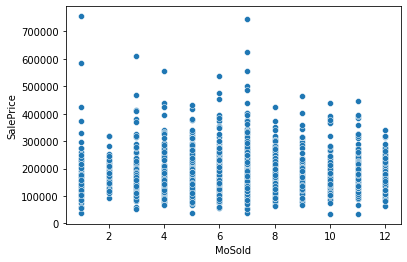

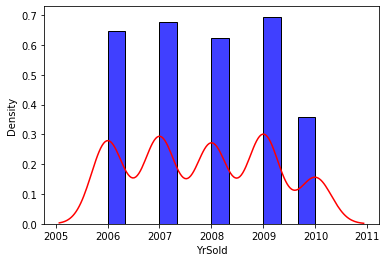

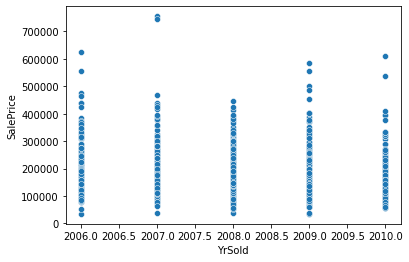

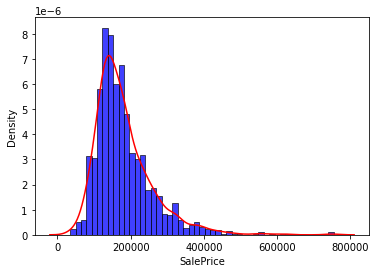

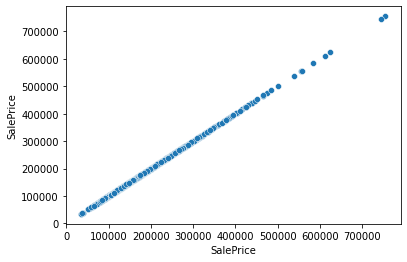

In [9]:
#distributions for all numeric variables 
for col in df_num.columns:
    # Density Plot and Histogram of all arrival delays
    #ax = sns.histplot(data=df_num, x=col, kde=True,line_kws={"color":"red"})
    sns.histplot(data=df_num,x=col, color='blue', stat='density')
    ax=sns.kdeplot(data=df_num,x=col, color='red')
    plt.show(ax)
    b=sns.scatterplot(data=df_num,x=col,y='SalePrice')
    plt.show()
    
    

In [10]:
df_cat.shape

(1460, 43)

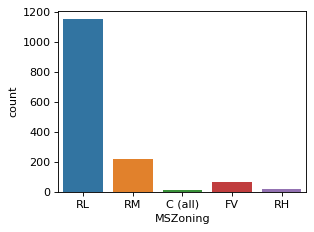

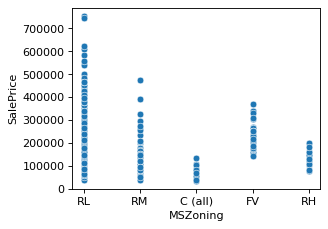

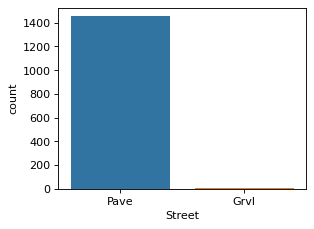

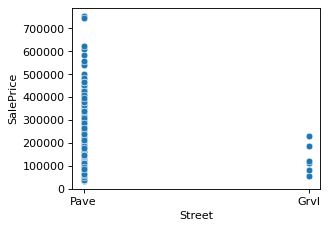

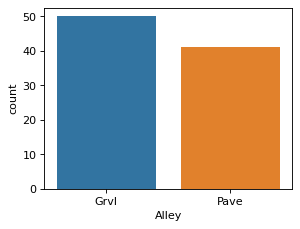

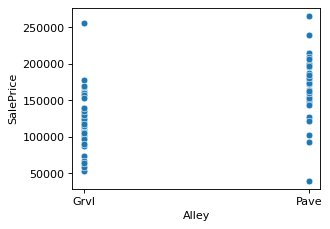

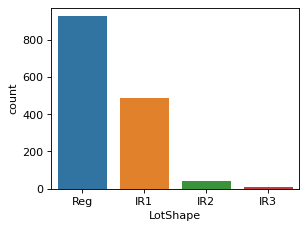

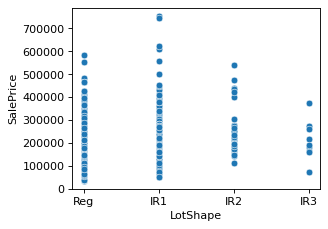

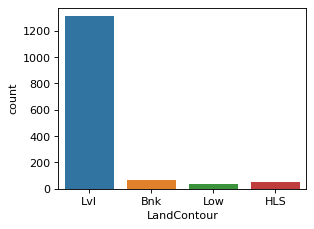

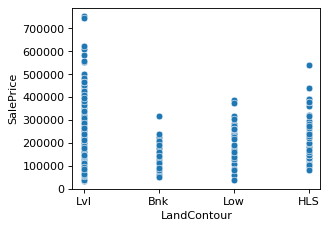

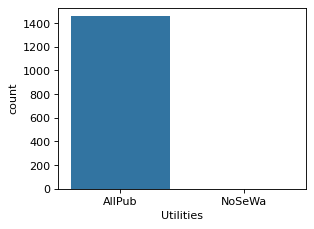

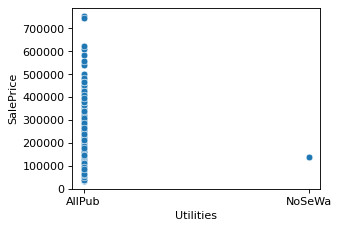

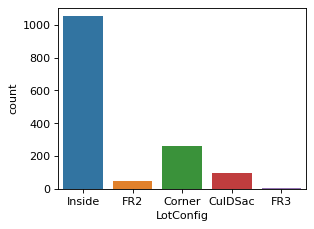

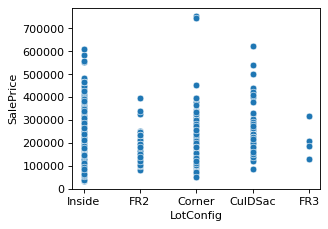

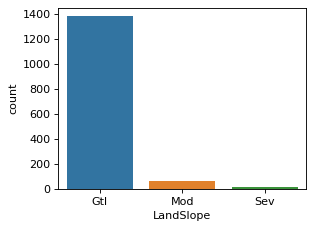

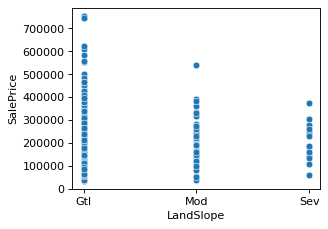

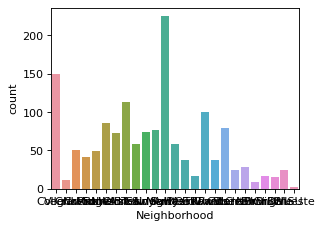

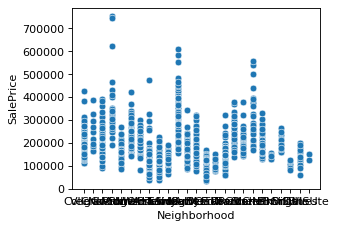

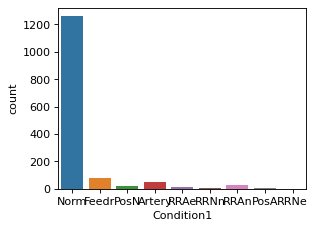

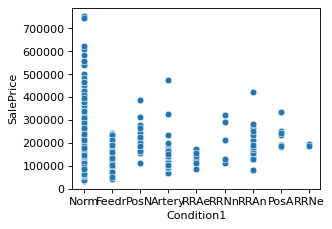

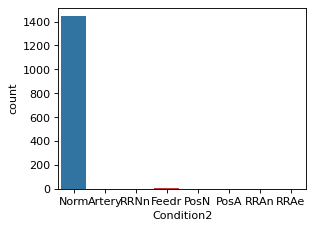

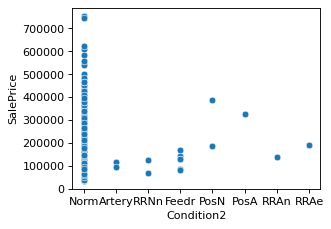

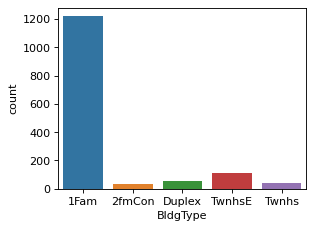

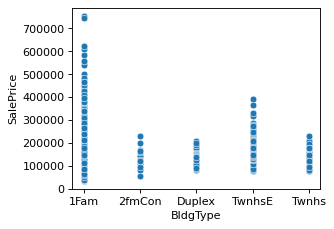

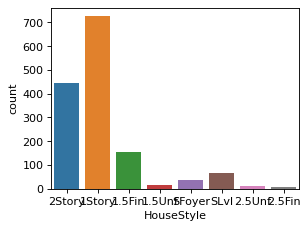

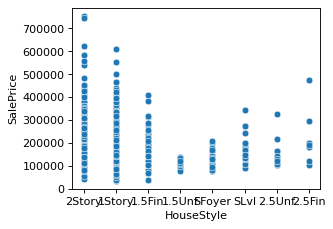

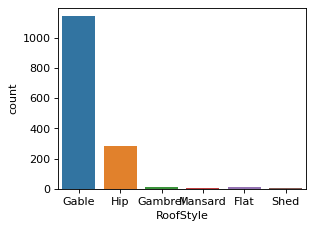

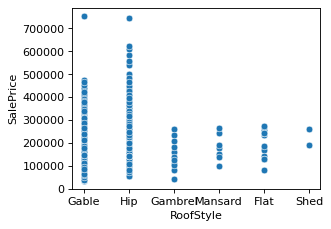

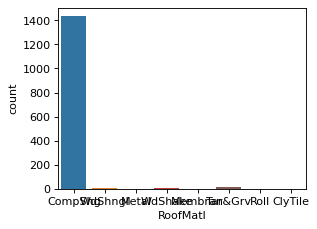

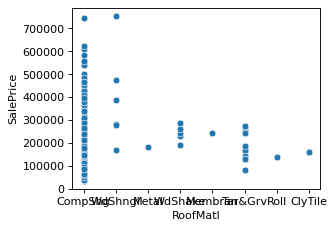

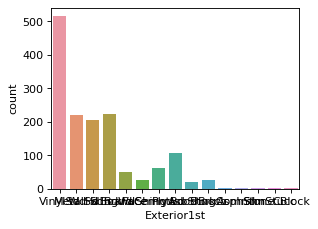

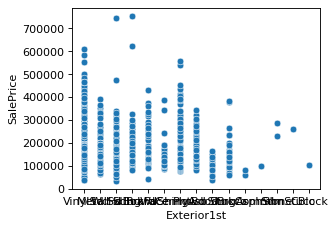

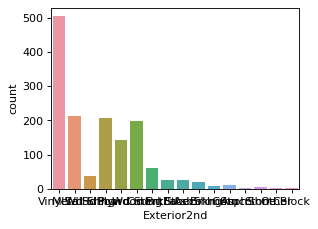

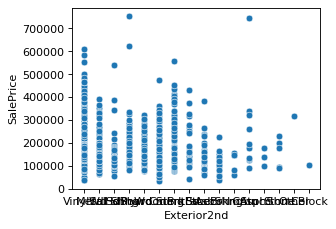

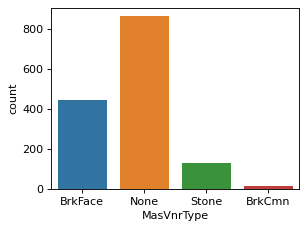

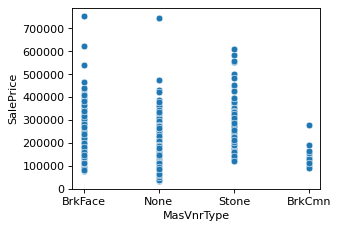

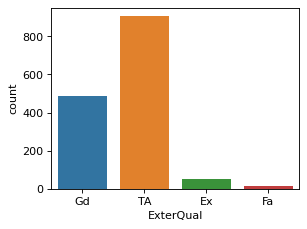

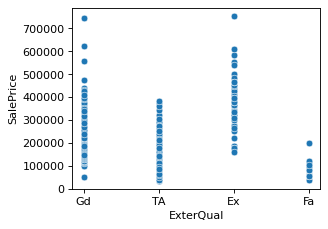

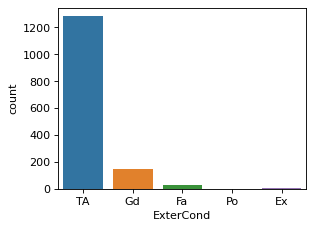

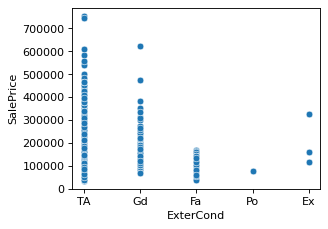

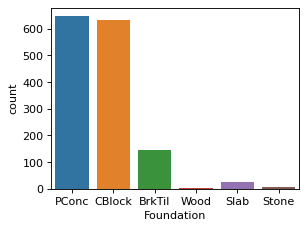

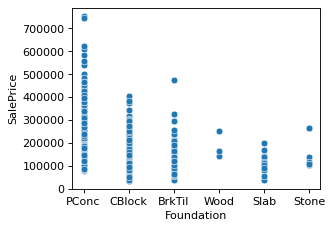

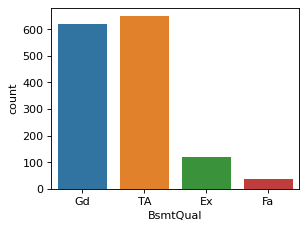

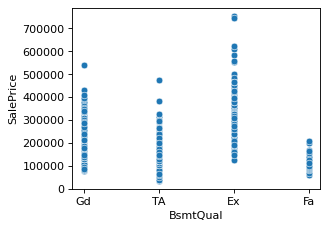

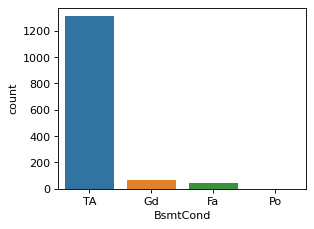

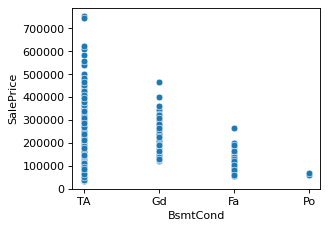

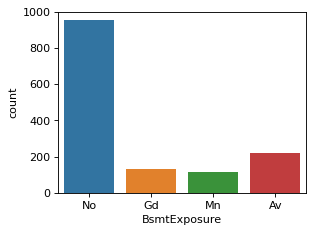

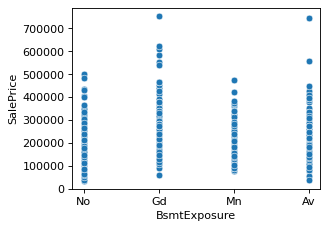

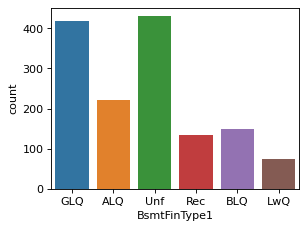

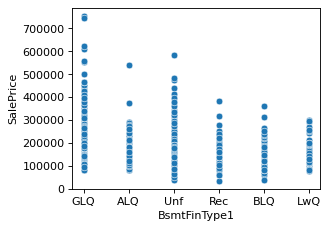

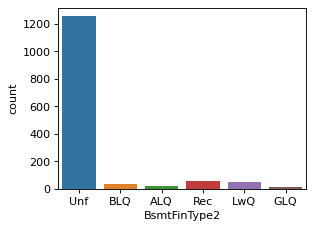

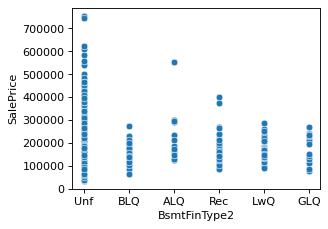

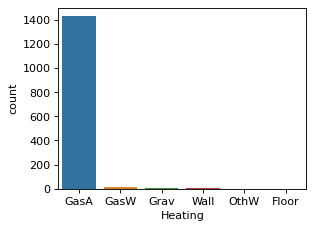

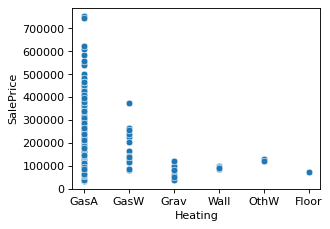

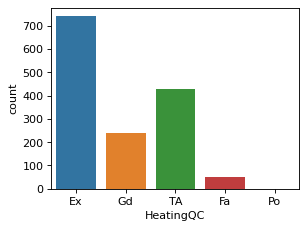

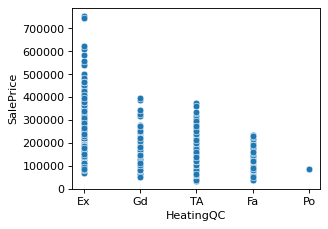

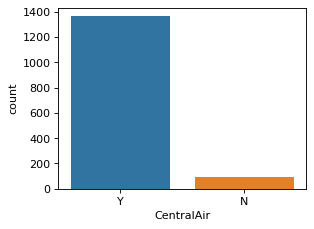

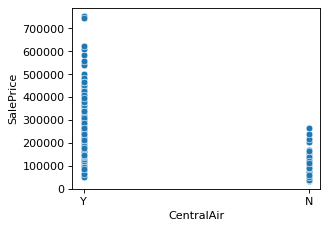

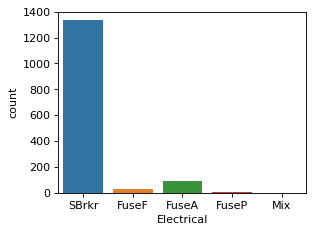

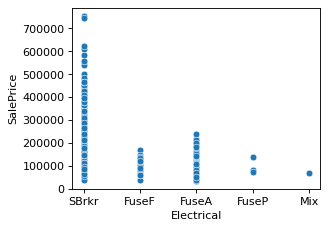

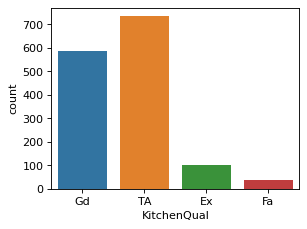

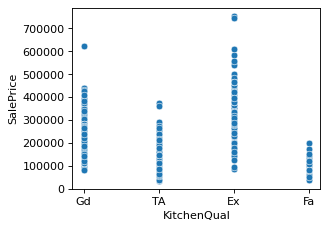

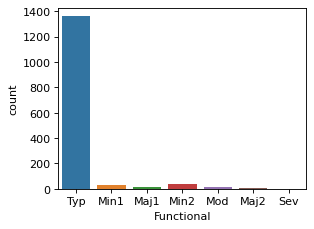

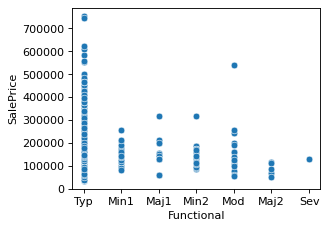

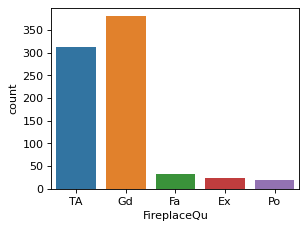

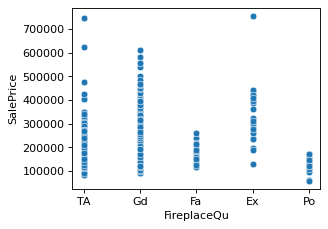

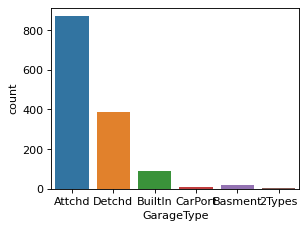

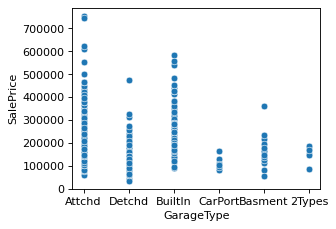

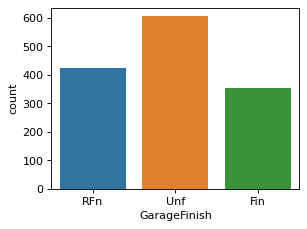

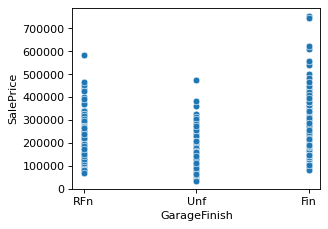

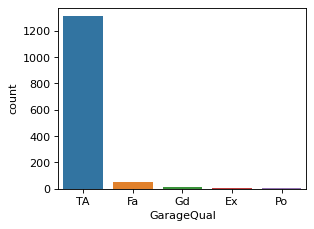

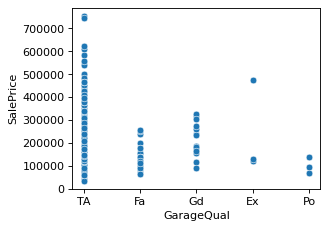

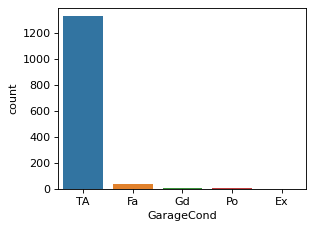

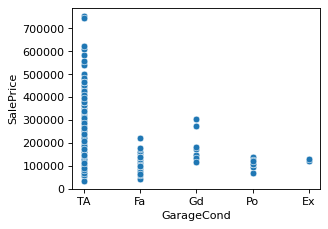

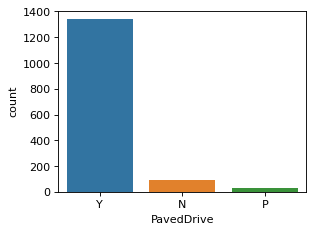

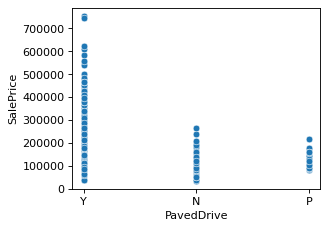

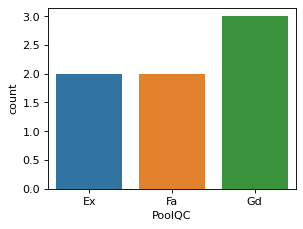

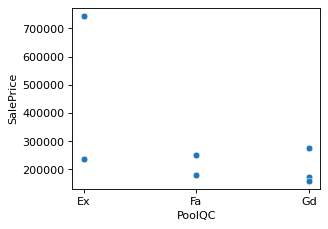

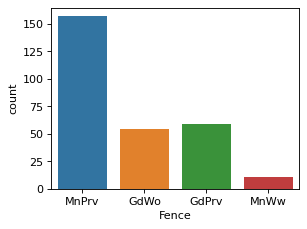

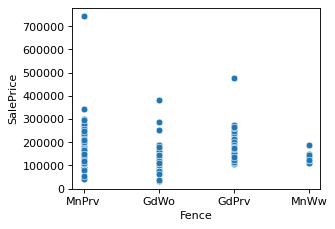

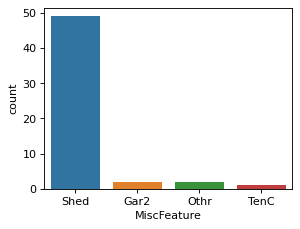

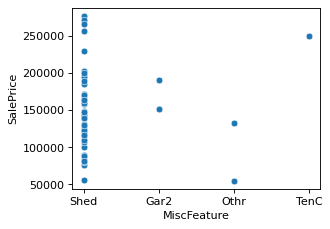

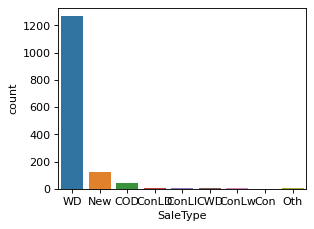

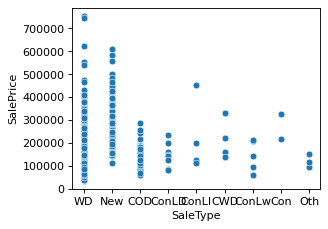

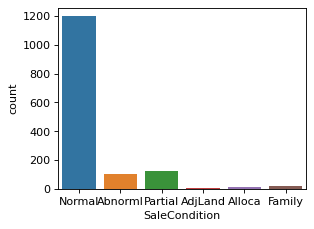

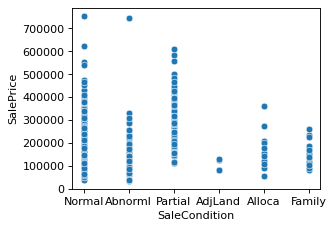

In [11]:
from matplotlib.pyplot import figure



for col in df_cat:
        figure(figsize=(4, 3), dpi=80)
        a=sns.countplot(data=df_cat, x=col)
        plt.show()
        figure(figsize=(4, 3), dpi=80)
        b=sns.scatterplot(data=train,x=col,y='SalePrice')
        plt.show()
      
        

# Removing variables with 80% of missing data

In [12]:
#To clean the test set in the same manner of train dataset i will merge the two dataset
#i will add nan value for sale price in test set
# i will create a column to distinguish between train and test set

train['train_test'] = 1
test['train_test'] = 0
test['SalePrice'] = np.NaN
all_data = pd.concat([train,test],ignore_index=True)

In [13]:
# look at numeric and categorical values separately 
adf_num=all_data.select_dtypes('number')
adf_cat=all_data.select_dtypes('object')
print(adf_num.shape)
print(adf_cat.shape)

(2919, 39)
(2919, 43)


In [14]:
#Creating a copy of train dataset
train_clean=train.copy()

In [15]:
#For numerical Variables
#I will remove variables with a number of NaN values greater than 80%
newlist = [x for x in df_num.columns if df_num[x].isna().sum() > 0]
na_val=df_num[newlist].isna().mean()*100
print(na_val)
print(df_num.shape)

#none numerical variables has a number of missing value greater than 80%
#The values for the remain variables will be imputed after

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64
(1460, 38)


In [16]:
#For categorical Variables
#I will remove variables with a number of NaN values greater than 80%
newlist = [x for x in df_cat.columns if df_cat[x].isna().sum() > 0]
na_val=df_cat[newlist].isna().mean()*100
print(na_val)
print(df_cat.shape)

#For categorical variables only 4 variables have a number of missing value greater than 80%:
#'Alley',
#'PoolQC',
#'Fence',
#'MiscFeature'

#The values for the remain variables will be imputed after


Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
(1460, 43)


In [17]:
col_dropped_nan=['Alley','PoolQC','Fence','MiscFeature']

In [18]:
#dropped data from partial and all dataset
df_cat.drop(col_dropped_nan,axis=1,inplace=True)
adf_cat.drop(col_dropped_nan,axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Feature Engineering on Numerical Data

In [19]:
#First of all i would like to see if the variables that i want to remove are corraleted with  the output variable
#Correlation is only an index for linear relationship but from the above  scatterplot we can observe that are not significant relationshiop
#between the variables that i want to drop and the output variable

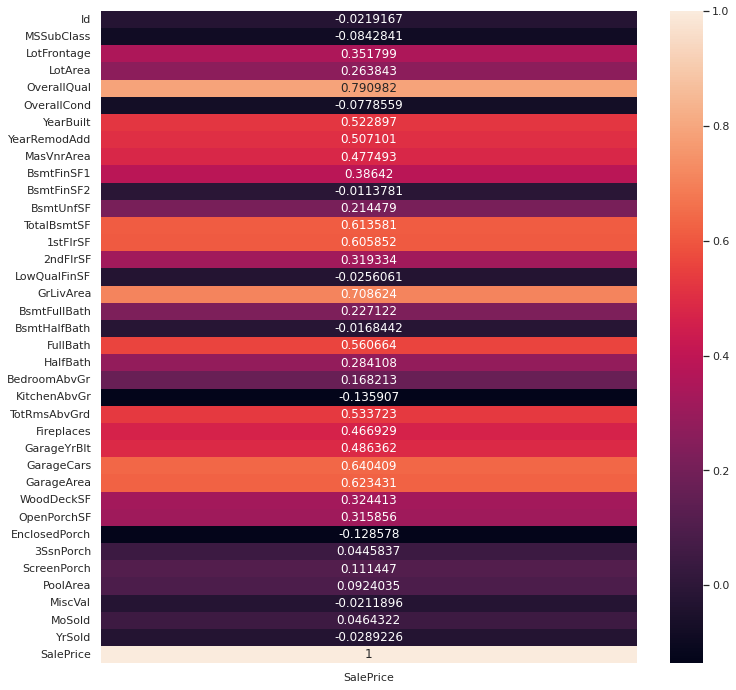

In [20]:

corrMatrix = df_num.corr()
sns.set(rc = {'figure.figsize':(12,12)})
a=sns.heatmap(df_num.corr().loc[:,['SalePrice']],fmt='g',annot=True)
plt.show(a)


In [21]:
drop_variable=np.where(corrMatrix['SalePrice']<0.25)
drop_variable
col=df_num.columns
df_num.drop(col[drop_variable],axis=1,inplace=True)
adf_num.drop(col[drop_variable],axis=1,inplace=True)
adf_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'train_test'],
      dtype='object')

In [22]:
#Columns that have been eliminated
col_dropped=col[drop_variable]
col_dropped

Index(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [23]:
df_num.shape

(1460, 21)

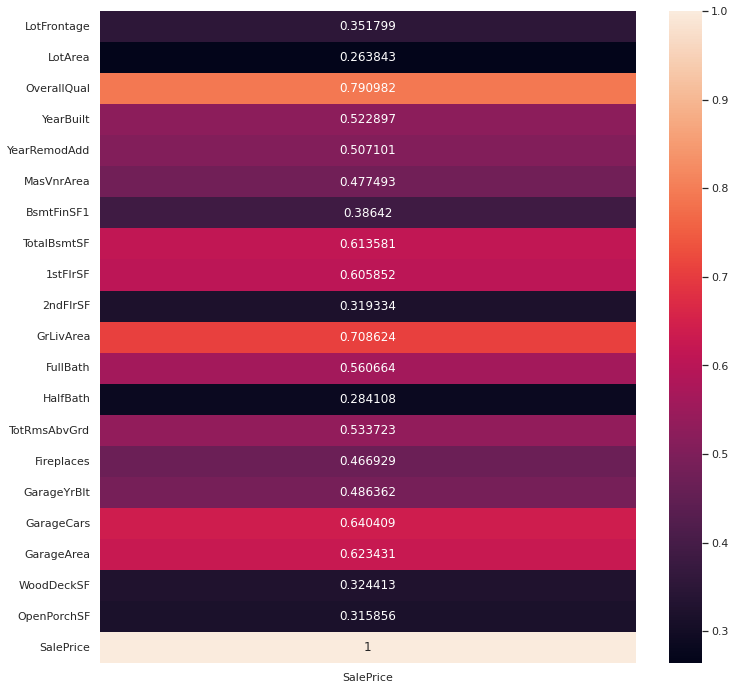

In [24]:
corrMatrix = df_num.corr()
sns.set(rc = {'figure.figsize':(12,12)})
a=sns.heatmap(df_num.corr().loc[:,['SalePrice']],fmt='g',annot=True)
plt.show(a)

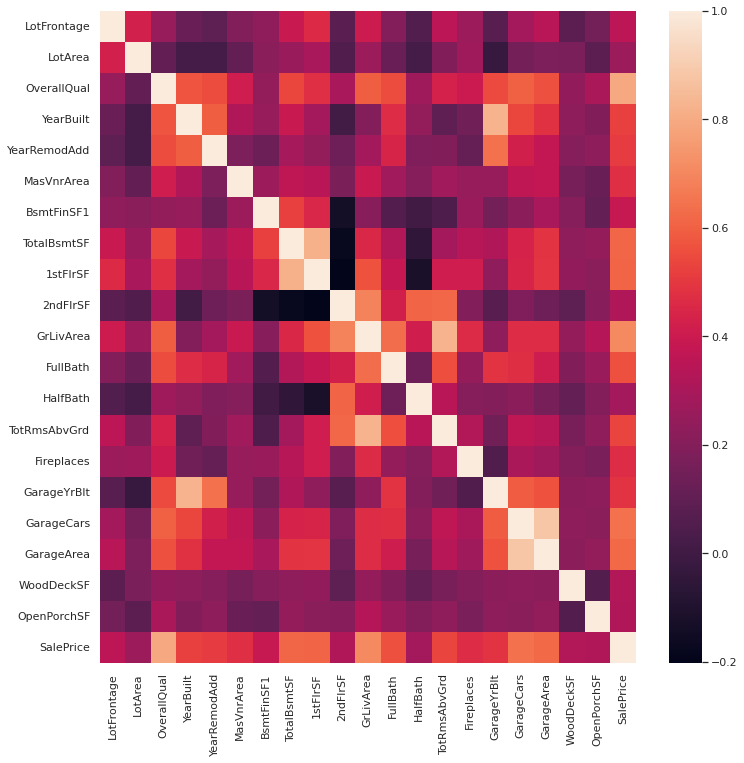

In [25]:
corrMatrix = df_num.corr()
sns.set(rc = {'figure.figsize':(12,12)})
a=sns.heatmap(df_num.corr(),fmt='g',annot=False)
plt.show(a)


## Testing Multicollinearity with Variation Inflaction Factor(VIF)

In [26]:
#before drop na values
df_num_copy=df_num.copy()
df_num.shape

(1460, 21)

In [27]:
#after we dropped na values
df_num_copy.dropna(inplace=True)
df_num_copy.shape

#in this case we dropped 339 observations this procedure  can cause biased dataset,for this reason is better impute the data and
#don't delete data

(1121, 21)

In [28]:
# now i am going to compute variation inflaction factor to determine if there are case of multi collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df_num_copy.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)


         feature           VIF
0    LotFrontage     14.530011
1        LotArea      3.381676
2    OverallQual     72.652815
3      YearBuilt  18855.973522
4   YearRemodAdd  12702.225710
5     MasVnrArea      1.929516
6     BsmtFinSF1      3.065104
7    TotalBsmtSF     29.702642
8       1stFlrSF   1001.319812
9       2ndFlrSF    201.672897
10     GrLivArea   1633.176808
11      FullBath     22.816980
12      HalfBath      3.264838
13  TotRmsAbvGrd     62.109079
14    Fireplaces      2.833193
15   GarageYrBlt  23656.341162
16    GarageCars     38.633487
17    GarageArea     34.314191
18    WoodDeckSF      1.826337
19   OpenPorchSF      1.887260
20     SalePrice     27.475420


In [29]:
df_num[['YearBuilt','GarageYrBlt']].head()

YearBuilt  GarageYrBlt
0       2003       2003.0
1       1976       1976.0
2       2001       2001.0
3       1915       1998.0
4       2000       2000.0

In [30]:
lis=df_num_copy['GarageYrBlt']!=df_num_copy['YearBuilt']
lis.sum()

250

In [31]:
lis=df_num_copy['YearBuilt']!=df_num_copy['YearRemodAdd']
lis.sum()

542

We can observe that the following variables carry with them the same information:

- garagecars and garagearea for obvious reason
- garageYrBlt and YearbUILT because only 250 observations have a different year of built
- yearRemodadd and yearbuilt  because most of the house has not been restructured

So i am going to peform a further feature engineering step with  these variables 

In [32]:
#garagecars and garagearea we will remove garage area that is less correlated
adf_num.drop('GarageArea',axis=1,inplace=True)
adf_num.columns

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'train_test'],
      dtype='object')

In [33]:
#yearRemodadd and yearbuilt | i am going to transform this numerical variable into categorical variable
#i will take as referenc point the last year of sold 2010

train.YrSold.max()

2010

In [34]:
#for train dataset 
colnew=[]

for i in range(len(adf_num)):
    diff= adf_num.loc[i,'YearRemodAdd']-adf_num.loc[i,'YearBuilt']
    if(diff==0): colnew.append('never')
    else:
        year=2010-adf_num.loc[i,'YearRemodAdd']
        if(year<=10): colnew.append('<10')
        elif(year>10 and year <=20): colnew.append('<20')
        else: colnew.append('>20')
            

  

In [35]:
RemodVariable = pd.DataFrame (colnew, columns = ['RemodHouse'])
adf_num.drop('YearRemodAdd',axis=1,inplace=True)
adf_cat['RemodHouse']=RemodVariable


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
adf_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'RemodHouse'],
      dtype='object')

In [37]:
adf_num_copy=adf_num.copy()
adf_num_copy.dropna(inplace=True)
adf_num_copy.shape
# the independent variables set
X = adf_num_copy.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)


         feature           VIF
0    LotFrontage      1.495180
1        LotArea      1.331561
2    OverallQual      3.583212
3      YearBuilt      4.630416
4     MasVnrArea      1.425298
5     BsmtFinSF1      1.617094
6    TotalBsmtSF      4.296763
7       1stFlrSF     97.693709
8       2ndFlrSF    122.240681
9      GrLivArea    171.263447
10      FullBath      2.872342
11      HalfBath      2.206403
12  TotRmsAbvGrd      3.441880
13    Fireplaces      1.498972
14   GarageYrBlt      3.872781
15    GarageCars      2.269592
16    WoodDeckSF      1.173632
17   OpenPorchSF      1.239507
18     SalePrice      4.621223
19    train_test  14819.066624


# Removing Outliers

In [38]:
#from matplotlib.pyplot import figure

#for col in adf_num.columns:
#      figure(figsize=(4, 3), dpi=80)
 #     sns.boxplot(x=adf_num[col])
  #    plt.show()

In [39]:
#adf_num.describe().T

In [40]:
#from scipy import stats

#z = np.abs(stats.zscore(adf_num))
#print(z)

# Removing Skeweness 

In [41]:
adf_num.fillna(adf_num.median(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
from scipy.stats import skew as skew

#for col in adf_num.columns:
 #    sns.histplot(data=df_num,x=col, color='blue', stat='density')
  #   ax=sns.kdeplot(data=df_num,x=col, color='red')
   #  plt.show(ax)
    # print(skew(adf_num[col]))

In [43]:
#Fist i will try to check if only applying the logaritm to the output variable sometingh will change

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


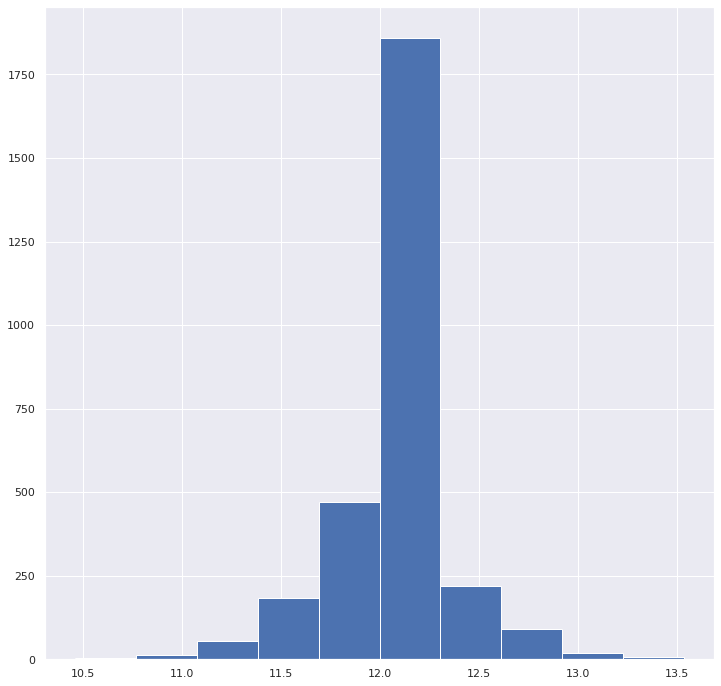

In [44]:
adf_num['SalePrice'] = np.log(adf_num['SalePrice'])
plt.hist(adf_num['SalePrice'])
plt.show()


In [45]:
#adf_num.drop('ln_SalePrice',axis=1,inplace=True)

# Feature Engineering on Categorical  Data

In [46]:
val=train.groupby('MSSubClass')['SalePrice'].median()
print(val.sort_values(ascending=False))

MSSubClass
60     215200.0
120    192000.0
80     166500.0
75     163500.0
20     159250.0
70     156000.0
160    146000.0
40     142500.0
85     140750.0
90     135980.0
50     132000.0
190    128250.0
45     107500.0
30      99900.0
180     88500.0
Name: SalePrice, dtype: float64


In [47]:
train.SalePrice.max()

755000

In [48]:
train_clean.columns
adf_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'RemodHouse'],
      dtype='object')

In [49]:
#Drop ID variable
train_clean.drop('Id',axis=1,inplace=True)
#adf_cat.drop('Id',axis=1,inplace=True)

In [50]:
#Binning MSSubClass Value

bin_MSSubClass = {'60': 'Type1',
                   '120': 'Type1',
                   '80':'Type2',
                    '75':'Type2',
                    '20':'Type2',
                      '70':'Type2',
                      '160':'Type2',
                      '40':'Type2',
                      '85':'Type2',
                      '90':'Type2',
                      '50':'Type3',
                      '190':'Type3',
                      '45':'Type3',
                      '30':'Type4',
                      '180':'Type4'}

train_clean['bin_MSSubClass'] = train_clean['MSSubClass'].map(bin_MSSubClass)

#Removing MSSubClass

train_clean.drop('MSSubClass',axis=1,inplace=True)
adf_cat

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
49         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
50         RL   Pave      IR2         Lvl    AllPub    Corner       Gtl   
51         RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
52         RM   Grvl      IR2 

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

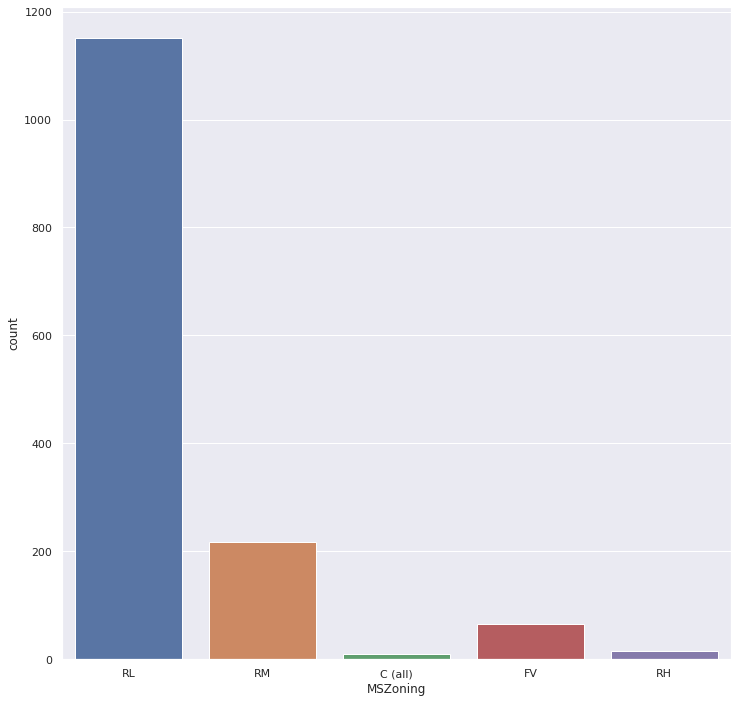

In [51]:
#MSZoning
sns.countplot(data=train,x='MSZoning')
#Binning C FV and RH because there are  few observations

In [52]:
#Binning MSZoning Value

bin_MSZoning = {'RL': 'RL',
                   'RM': 'RM',
                   'C(All)':'Other',
                    'FV':'Other',
                    'RH':'Other',
                     }

train_clean['bin_MSZoning'] = train_clean['MSZoning'].map(bin_MSZoning)



<AxesSubplot:xlabel='bin_MSZoning', ylabel='count'>

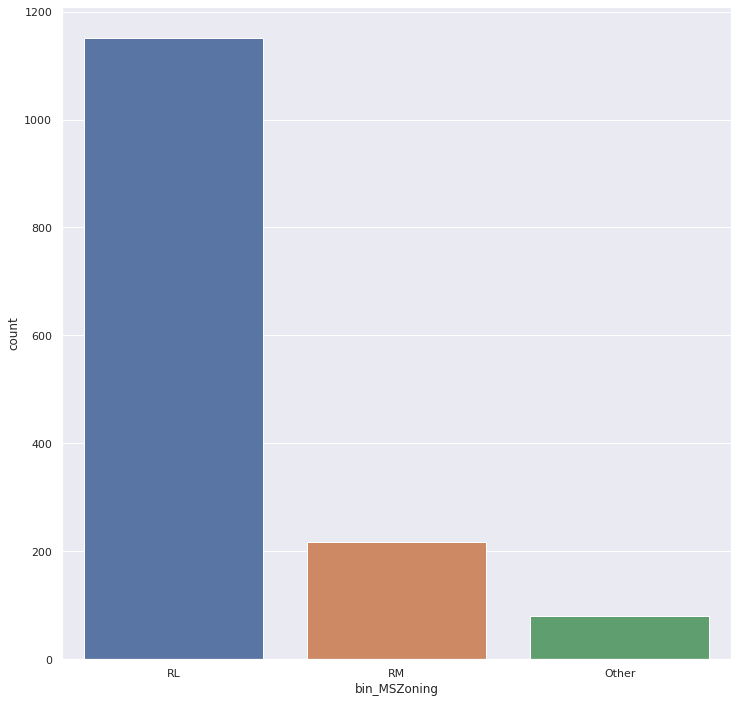

In [53]:
sns.countplot(data=train_clean,x='bin_MSZoning')

<AxesSubplot:xlabel='bin_MSZoning', ylabel='SalePrice'>

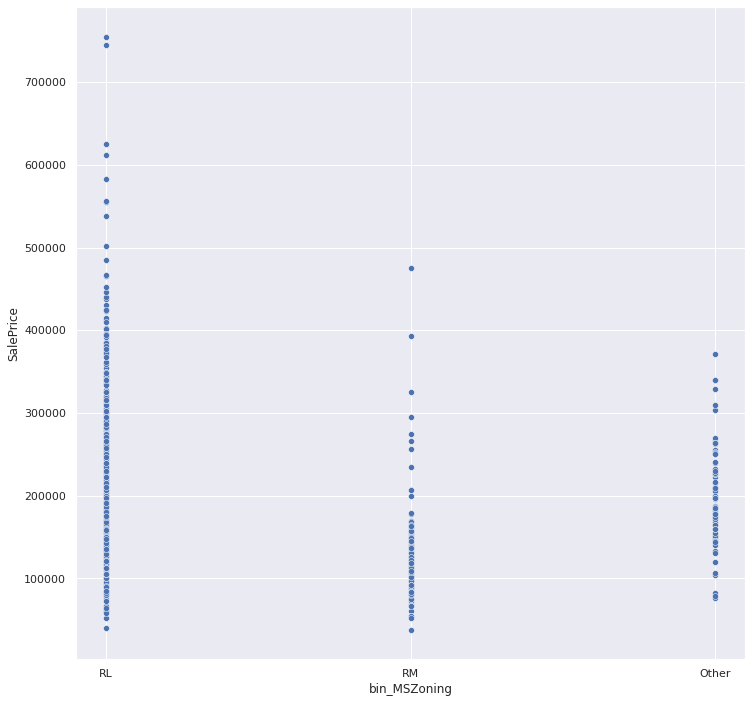

In [54]:
sns.scatterplot(data=train_clean,x='bin_MSZoning',y='SalePrice')

In [55]:
#Removing MSZoning
train_clean.drop('MSZoning',axis=1,inplace=True)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

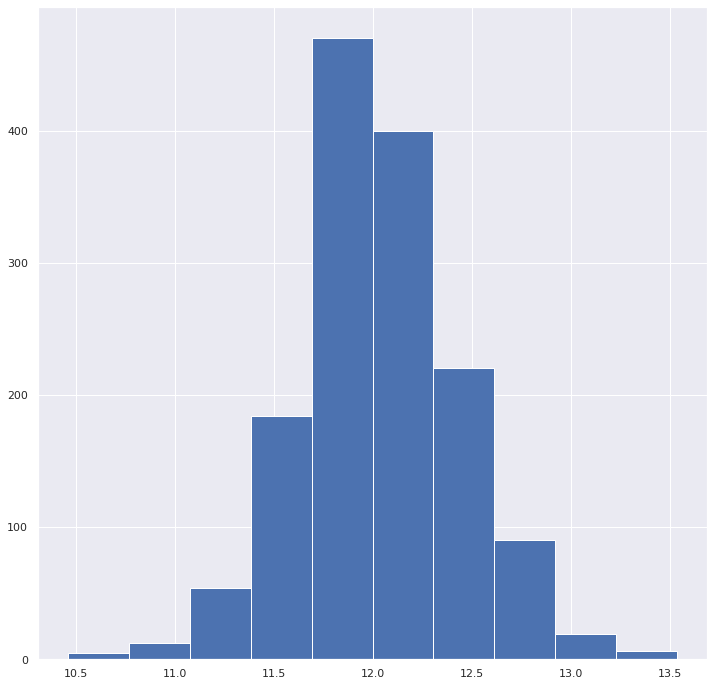

In [56]:
#Try to balance SalePrice distribution
# 'Salary' column
train_clean['ln_SalePrice'] = np.log(train_clean['SalePrice'])
plt.hist(train_clean['ln_SalePrice'])
#After

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

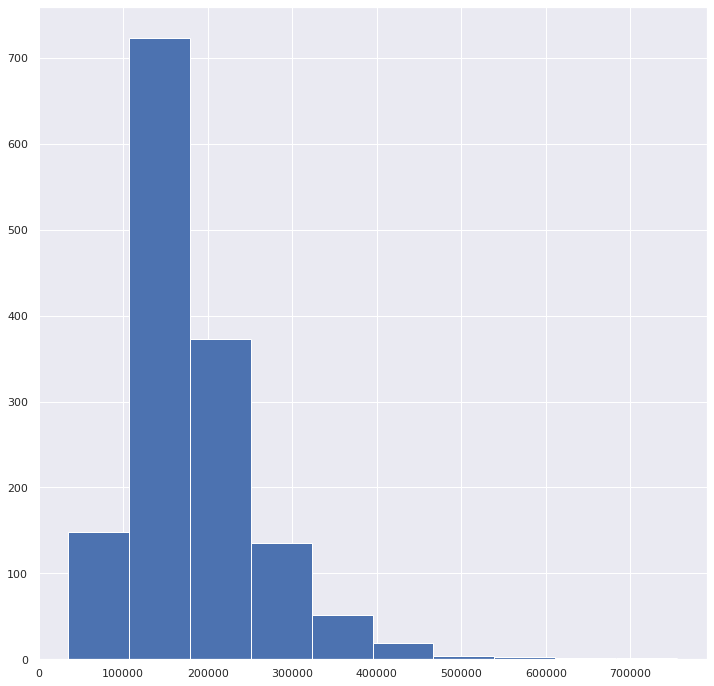

In [57]:
#Before
plt.hist(train['SalePrice'])

In [58]:
#Lotshape
val=train.groupby('LotShape')['SalePrice'].median()
print(val.sort_values(ascending=False))

LotShape
IR2    221000.0
IR3    203570.0
IR1    189000.0
Reg    146000.0
Name: SalePrice, dtype: float64


In [59]:
adf_cat=adf_cat[['SaleCondition','FireplaceQu','KitchenQual','ExterQual','CentralAir']]

# Imputing Nan values and spliting data

In [60]:
adf_cat.fillna(adf_cat.mode(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [61]:
#get dummies

dummy = pd.get_dummies(adf_cat)

In [62]:
dummy.head()

SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   FireplaceQu_Ex  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_Po  ...  \
0               0               0               1               0  ...   
1               0               0               0               0  ...   
2               0               0               0               0  ...   
3               0               0               1               0  ...   
4               0               0               0               0  ...   

   KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
0               0               0               1               0   
1               0               0               0               1   
2               0               0               1               0   
3               0               0               1               0   
4               0               0               1               0   

   ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  CentralAir_N  \
0             0             0             1             0             0   
1             0             0             0             1             0   
2             0             0             1             0             0   
3             0             0             0             1             0   
4             0             0             1             0             0   

   CentralAir_Y  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 21 columns]

In [63]:
adf_num.fillna(adf_num.mean(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [64]:
adf_num = pd.concat([adf_num, dummy], axis=1, join='inner')
adf_num.head()

LotFrontage  LotArea  OverallQual  YearBuilt  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7       2003       196.0       706.0   
1         80.0     9600            6       1976         0.0       978.0   
2         68.0    11250            7       2001       162.0       486.0   
3         60.0     9550            7       1915         0.0       216.0   
4         84.0    14260            8       2000       350.0       655.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  KitchenQual_Ex  \
0        856.0       856       854       1710  ...               0   
1       1262.0      1262         0       1262  ...               0   
2        920.0       920       866       1786  ...               0   
3        756.0       961       756       1717  ...               0   
4       1145.0      1145      1053       2198  ...               0   

   KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  ExterQual_Ex  ExterQual_Fa  \
0               0               1               0             0             0   
1               0               0               1             0             0   
2               0               1               0             0             0   
3               0               1               0             0             0   
4               0               1               0             0             0   

   ExterQual_Gd  ExterQual_TA  CentralAir_N  CentralAir_Y  
0             1             0             0             1  
1             0             1             0             1  
2             1             0             0             1  
3             0             1             0             1  
4             1             0             0             1  

[5 rows x 41 columns]

In [65]:
train_num_cl=adf_num[adf_num['train_test']==1]
test_num_cl=adf_num[adf_num['train_test']==0]
test_num_cl.drop('SalePrice',axis=1,inplace=True)
train_num_cl.drop('train_test',axis=1,inplace=True)
test_num_cl.drop('train_test',axis=1,inplace=True)
#train_num_cl.fillna(train_num_cl.mean(),inplace=True)
#test_num_cl.fillna(test_num_cl.mean(),inplace=True)



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
y_train=train_num_cl['SalePrice']
train_num_cl.drop('SalePrice',axis=1,inplace=True)
train_num_cl.info()
train_num_cl.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1460 non-null   float64
 1   LotArea                1460 non-null   int64  
 2   OverallQual            1460 non-null   int64  
 3   YearBuilt              1460 non-null   int64  
 4   MasVnrArea             1460 non-null   float64
 5   BsmtFinSF1             1460 non-null   float64
 6   TotalBsmtSF            1460 non-null   float64
 7   1stFlrSF               1460 non-null   int64  
 8   2ndFlrSF               1460 non-null   int64  
 9   GrLivArea              1460 non-null   int64  
 10  FullBath               1460 non-null   int64  
 11  HalfBath               1460 non-null   int64  
 12  TotRmsAbvGrd           1460 non-null   int64  
 13  Fireplaces             1460 non-null   int64  
 14  GarageYrBlt            1460 non-null   float64
 15  Gara

LotFrontage              0
LotArea                  0
OverallQual              0
YearBuilt                0
MasVnrArea               0
BsmtFinSF1               0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
GrLivArea                0
FullBath                 0
HalfBath                 0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
WoodDeckSF               0
OpenPorchSF              0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
FireplaceQu_Ex           0
FireplaceQu_Fa           0
FireplaceQu_Gd           0
FireplaceQu_Po           0
FireplaceQu_TA           0
KitchenQual_Ex           0
KitchenQual_Fa           0
KitchenQual_Gd           0
KitchenQual_TA           0
ExterQual_Ex             0
ExterQual_Fa             0
ExterQual_Gd             0
ExterQual_TA             0
C

# Scaling data

In [67]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = train_num_cl.copy()
X_scaled= scale.fit_transform(X_scaled)


In [68]:
X_test_scaled = test_num_cl.copy()
X_test_scaled= scale.fit_transform(X_test_scaled)

## Model Building (Baseline Validation Performance)
Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set. 

- Linear Regression (0.77)
- Decision Tree (0.71)
- K Nearest Neighbor (0.80)
- **Random Forest (0.86)**
- Support Vector Classifier (-0.05)
- Xtreme Gradient Boosting (0.84)
- Soft Voting Classifier - All Models (0.8494)

Value before applying logaritm to output

# Try to modelize a model only with numerical data

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [70]:
#I usually use Naive Bayes as a baseline for my classification tasks 
lr = LinearRegression()
cv = cross_val_score(lr,train_num_cl,y_train,cv=5)
print(cv)
print(cv.mean())


[0.87147025 0.84154179 0.86932958 0.85296066 0.70422641]
0.8279057377050527


In [71]:
#I usually use Naive Bayes as a baseline for my classification tasks 
lr = LinearRegression()
cv = cross_val_score(lr,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.87147025 0.84154179 0.86932958 0.85296066 0.70414861]
0.8278901782963285


In [72]:
dt = DecisionTreeRegressor(random_state = 1)
cv = cross_val_score(dt,train_num_cl,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68434549 0.73830964 0.75709236 0.6691922  0.73889056]
0.7175660501612129


In [73]:
dt = DecisionTreeRegressor(random_state = 1)
cv = cross_val_score(dt,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68464599 0.73835911 0.75909611 0.66756485 0.73931939]
0.7177970909222486


In [74]:
knn = KNeighborsRegressor(n_neighbors=10)
cv = cross_val_score(knn,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81034705 0.77143238 0.76582976 0.7644178  0.77195757]
0.776796910674175


In [75]:
rf = RandomForestRegressor(random_state = 1,max_features='sqrt',n_estimators=500)
cv = cross_val_score(rf,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())


#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_scaled,y_train)

y_pred=rf.predict(train_num_cl)


[0.8830073  0.85397647 0.87126586 0.87960829 0.86844968]
0.8712615205787101


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [76]:
print(y_pred[0:5])
print(y_train.head())

[12.70470086 12.62897322 12.71798077 12.66239963 12.73715009]
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


In [77]:
svr = SVR(C=1.0, epsilon=0.2)
cv = cross_val_score(svr,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798638 0.77703451 0.76355427 0.82095354 0.80096519]
0.8000987773243537


In [78]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state =1)
cv = cross_val_score(xgb,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.86152054 0.84451518 0.84245776 0.84061119 0.86237677]
0.8502962872306483


In [79]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators = [('lr',lr),('knn',knn),('rf',rf),('svr',svr),('xgb',xgb)]) 
cv = cross_val_score(voting_reg,X_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.88748586 0.85116304 0.85942834 0.86357405 0.85970047]
0.8642703501028354


In [80]:
voting_reg.fit(X_scaled,y_train)
y_hat_base_vr = np.exp(voting_reg.predict(X_test_scaled))
basic_submission = {'Id': test.Id, 'SalePrice': y_hat_base_vr}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [81]:

y_rf = np.exp(rf.predict(X_test_scaled))
basic_submission_2 = {'Id': test.Id, 'SalePrice': y_rf}
base_submission_2 = pd.DataFrame(data=basic_submission_2)
base_submission_2.to_csv('base_submission_2.csv', index=False)


In [82]:
base_submission_2.head(50)

Id      SalePrice
0   1461  128063.080496
1   1462  158138.883562
2   1463  177023.704937
3   1464  189615.589898
4   1465  187027.259740
5   1466  186153.260163
6   1467  167210.179521
7   1468  175160.991523
8   1469  181203.437605
9   1470  121931.283180
10  1471  196461.128514
11  1472   99153.526339
12  1473  101201.559068
13  1474  152730.420901
14  1475  117318.409727
15  1476  390643.641094
16  1477  248671.401438
17  1478  309578.665066
18  1479  291066.467822
19  1480  476163.798954
20  1481  312420.753274
21  1482  207185.196733
22  1483  182824.996549
23  1484  169701.475868
24  1485  174253.499915
25  1486  207956.355474
26  1487  298463.705095
27  1488  241614.446401
28  1489  201204.945393
29  1490  212533.996575
30  1491  196601.600682
31  1492   99822.227606
32  1493  169812.708378
33  1494  305493.466117
34  1495  289394.547396
35  1496  220196.477759
36  1497  176603.786122
37  1498  156575.230178
38  1499  154990.181096
39  1500  158679.969904
40  1501  176779.449626
41  1502  149936.622270
42  1503  266486.841937
43  1504  224874.934752
44  1505  217397.695920
45  1506  171953.501392
46  1507  240268.123900
47  1508  191837.645964
48  1509  161587.347068
49  1510  152373.620581